# Ecuaciones diferenciales y Sistemas dinámicos

__Ejercicio 1:__ Resolver oscilador amortiguado:
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.
__Nota:__ El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de _Euler_ que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

In [1]:
function euler(f,t0,x0)#creamos esta función que sea independiente de la dimensión del sistema auxiliandonos de lo que realizó previamente el profesor
     y = x0
     h = t0[2]-t0[1]
     x=[]
     push!(x,y)
     for i in 2:length(t0)
        t = i*h
        y = y + f(y,t)*h
        push!(x,y) 
     end
     return x
end

euler (generic function with 1 method)

In [2]:
function RK(f,t0,x0) #hacemos lo mismo con el método de runge-kutta
     y = x0
     h = t0[2]-t0[1]
     x=[]
     push!(x,y)
     for i in 2:length(t0)
        t = i*h
        k1 = f(y,t)
        k2 = f(y+(h/2)*k1,t+(h/2))
        k3 = f(y+(h/2)*k2, t+(h/2))
        k4 = f(y+h*k3, t+h);
        y = y+(h/6)*(k1+2*k2+2*k3+k4)
        push!(x,y) 
     end
     return x
end

RK (generic function with 1 method)

In [3]:
f(x,t)=[x[2], -1.0*x[1]-1.0*x[2]] #esta es nuestra función con la condiciones pedidas

f (generic function with 1 method)

In [4]:
a=0:0.2:10 #Se tomara el intervalo [0,10] con h = 0.01
e=euler(f,a,[1,0]) #aplicamos el método de euler a f con x_0=1, v_0=0
r=RK(f,a,[1,0]) #analogamente aplicamos runge-kutta con las misma condiciones

51-element Array{Any,1}:
 [1,0]                    
 [0.981333,-0.180067]     
 [0.930591,-0.320987]     
 [0.855421,-0.424764]     
 [0.762967,-0.494382]     
 [0.659703,-0.533517]     
 [0.55132,-0.54628]       
 [0.442662,-0.53699]      
 [0.337705,-0.509981]     
 [0.239571,-0.46944]      
 [0.150568,-0.419286]     
 [0.0722581,-0.363072]    
 [0.00553211,-0.303929]   
 ⋮                        
 [0.0233438,-0.0106258]   
 [0.0209946,-0.0127175]   
 [0.0183127,-0.0139706]   
 [0.0154553,-0.0144917]   
 [0.0125573,-0.0143947]   
 [0.0097309,-0.0137951]   
 [0.00706521,-0.0128058]  
 [0.00462743,-0.0115331]  
 [0.00246433,-0.0100743]  
 [0.000604288,-0.00851595]
 [-0.00094043,-0.00693236]
 [-0.00217116,-0.00538533]

In [5]:
ex=map(x->x[1],e) #guardamos listas de posiciones y velocidades
ev=map(x->x[2],e)
rx=map(x->x[1],r)
rv=map(x->x[2],r)

51-element Array{Any,1}:
  0         
 -0.180067  
 -0.320987  
 -0.424764  
 -0.494382  
 -0.533517  
 -0.54628   
 -0.53699   
 -0.509981  
 -0.46944   
 -0.419286  
 -0.363072  
 -0.303929  
  ⋮         
 -0.0106258 
 -0.0127175 
 -0.0139706 
 -0.0144917 
 -0.0143947 
 -0.0137951 
 -0.0128058 
 -0.0115331 
 -0.0100743 
 -0.00851595
 -0.00693236
 -0.00538533

In [6]:
using PyPlot#vamos a graficar

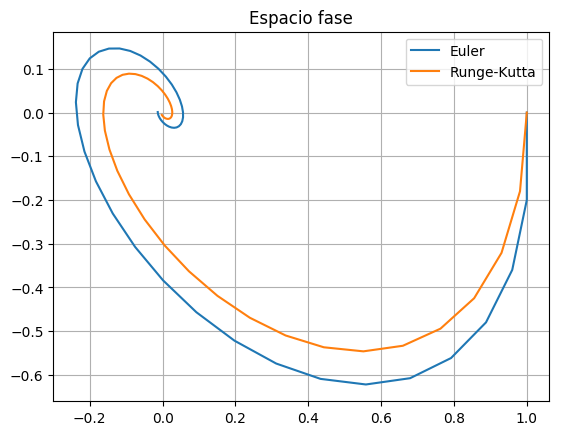

PyObject <matplotlib.legend.Legend object at 0x7f190dc2db90>

In [7]:
title("Espacio fase") #Graficamos posición contra velocidad, es decir, el espacio fase
grid("on")
plot(ex,ev, label="Euler")
plot(rx,rv, label="Runge-Kutta")
legend()

__Ejercicio 2:__ Resolver el péndulo simple:
$$l \ddot\theta=-g \sin(\theta),$$
usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

In [8]:
g(x,t)=[x[2], -sin(x[1])] #definimos nuestra función como se pide en el enunciado

g (generic function with 1 method)

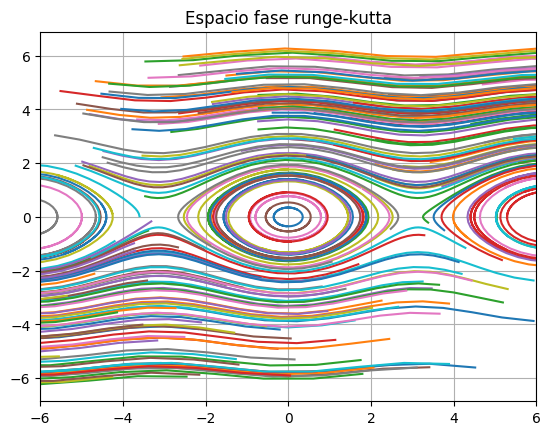

(-6,6)

In [10]:
title("Espacio fase runge-kutta") #hacemos lo mismo que habiamos que con el anterior,pero solo con el método de runge-kutta
grid("on")
for i in 1:200 #ponemos muchas condiciones iniciales para que se aprecie más
    b=6*(2*rand(1)-1) #Tomamos valores aleatorios entre el -6 y 6.
    c=6*(2*rand(1)-1)
    vec=RK(g,a,[b,c]) 
    rkx=map(x->x[1],vec)
    rkv=map(x->x[2],vec)
    plot(rkx,rkv)
end
xlim(-6,6)

Aparecen dos movimientos presentes,los cuales son: a) trayectorias abiertas b) trayectorias cerradas, cada una tiene su propia "física", por ejemplo en las trayectorias abiertas, nos dice que la posición es libre, es decir, el objeto no está confinado en una región del espacio, aunque sus velocidades si lo están, este tipo de soluciones donde la fuerza aplicado al objeto no lo confinan, de hecho su velocidad aumenta y luego disminuye pero no cambia de dirección, digamos que oscila respecto a un printo que se mueve, a este tipo de estados se les llama estados __no ligados__, mientras que en las trayectorias cerradas, los valores de x no pueden tomar cualquier valor, solo los que estan en una cierta región, esto se dice como que la partícula esta confinada, es decir, oscila cerca de algún punto inerte, a este tipo de estados se les llama estados __ligados__

__Ejercicio 3:__ Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$, compruebe además que el $1$ es un _repulsor_ y el $-1$ un _atractor_. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [11]:
h(x,t)=x^2-1 #definimos nuestra función

h (generic function with 1 method)

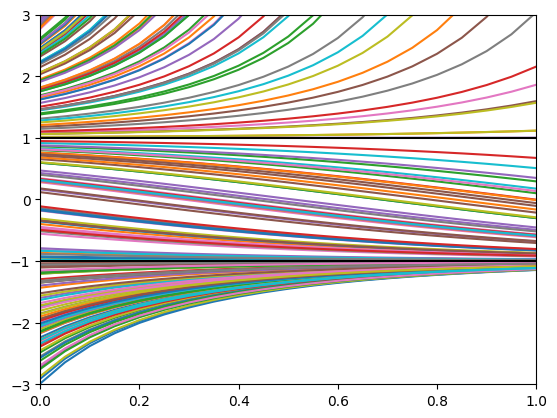

(-3,3)

In [13]:
a1=0:0.05:1#imponemos muchas condiciones para ver como se comportan cerca de los puntos fijos
for i in 1:200
    b=3*(2*rand()-1)
    c=RK(h,a1,b)
    plot(a1,c)
end
plot([0,1],[1,1],color="k") #pintamos las rectas +1,-1 que son los puntos fijos
plot([0,1],[-1,-1],color="k")
axes()[:set_xlim]([0,1])
axes()[:set_ylim]([-3,3])

por la gráfica se aprecia que como se acercan soluciones por ambos lados a $-1$, este es un punto atractor o también conocido como sumidero, mientras que como se alejan soluciones de $+1$, este es un punto repulsor o también conocido como fuente

__Ejercicio 4:__ También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

los puntos dijos del sistema son aquellos valores de $x$ tales que $x^2=0$, pero como trabajamos con reales, el único punto fijo es $x_0=0$, con esto en mente podemos aplicar lo mismo que en el ejercicio anterior

In [14]:
p(x,t)=x^2 #Definimos la función.

p (generic function with 1 method)

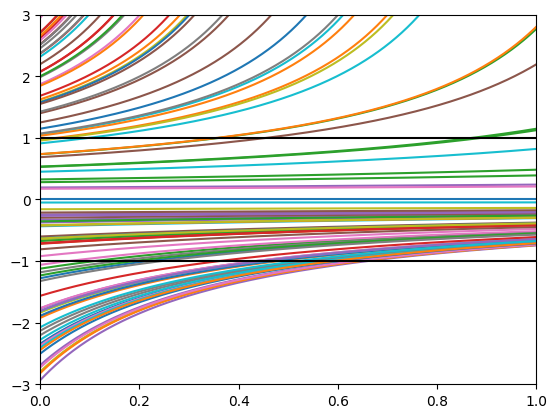

(-3,3)

In [37]:
a2=0:0.001:1
for i in 1:100
    a=3*(2*rand()-1)
    b=RK(p,a2,a)
    plot(a2,b)
end
plot([0,1],[1,1],color="k") #Aqui pintamos la recta el 1 y -1, que son los puntos a donde se alejan y acercan las lineas.
plot([0,1],[-1,-1],color="k")
axes()[:set_xlim]([0,1])
axes()[:set_ylim]([-3,3])

por la gráfica se observa que para condiciones con valores negativos, se aproximan a $x_0$, sin embargo para valores positivos se alejan, por tanto $x_0$ es atractor por la izquierda y repulsor por la derecha

__Ejercicio 5:__ Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones:
$$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$
donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$
Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
* $a=c=1$, $b=d=0$
* $a=c=-1$, $b=d=0$
* $a=1$, $b=-2$, $c=d=0$
* $a=1$, $b=-0.5$, $c=d=0$
* $a=d=0$, $b=-c=1$
* $a=d=1$, $b=-c=1$
* $a=d=-1$, $b=-c=1$
* $a=d=-1$, $b=-c=-1$
* $a=b=1$, $b=4,c=-2$
* $a=b=d=-1$, $c=0$

In [17]:
A(a,b,c,d,x,t)=[a*x[1]+b*x[2],c*x[1]+d*x[2]] #definimos nuestra matriz que desde luego, depende de los coeficientes, x y t
tt=0:0.01:5#tomamos un intervalo de tiempo

0.0:0.01:5.0

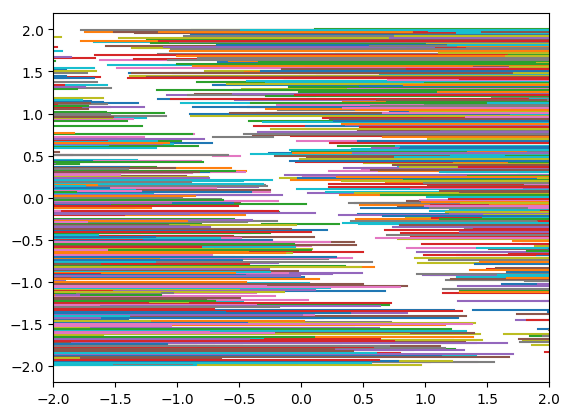

(-2,2)

In [18]:
A1(x,t)=A(1,1,0,0,x,t) #aplicamos las primeras condiciones
for i in 1:1000
    x0=2*(2*rand()-1)
    y0=2*(2*rand()-1)#valores entre -2 y 2
    x1=map(x->x[1],RK(A1,tt,[x0,y0]))
    y1=map(x->x[2],RK(A1,tt,[x0,y0]))    
    plot(x1,y1)
end
xlim(-2,2)

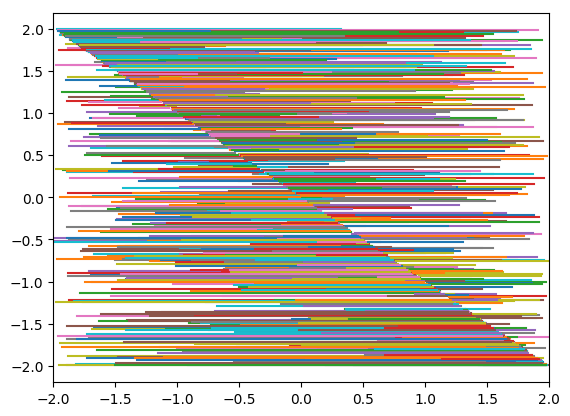

(-2,2)

In [19]:
A2(x,t)=A(-1,-1,0,0,x,t)
for i in 1:1000
    x0=2*(2*rand()-1)
    y0=2*(2*rand()-1)#valores entre -2 y 2
    x1=map(x->x[1],RK(A2,tt,[x0,y0]))
    y1=map(x->x[2],RK(A2,tt,[x0,y0]))
    plot(x1,y1)
end
xlim(-2,2)

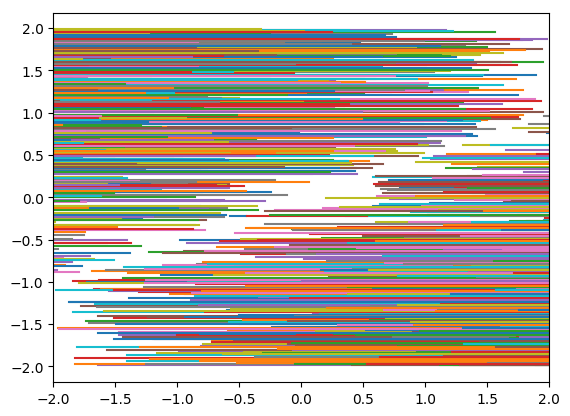

(-2,2)

In [20]:
A3(x,t)=A(1,-2,0,0,x,t)
for i in 1:1000
    x0=2*(2*rand()-1)
    y0=2*(2*rand()-1)#valores entre -2 y 2
    x1=map(x->x[1],RK(A3,tt,[x0,y0]))
    y1=map(x->x[2],RK(A3,tt,[x0,y0]))
    plot(x1,y1)
end
xlim(-2,2)

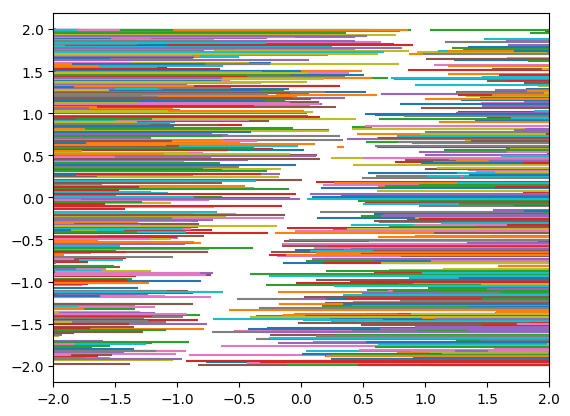

(-2,2)

In [21]:
A4(x,t)=A(1,-0.5,0,0,x,t)
for i in 1:1000
    x0=2*(2*rand()-1)
    y0=2*(2*rand()-1)#valores entre -2 y 2
    x1=map(x->x[1],RK(A4,tt,[x0,y0]))
    y1=map(x->x[2],RK(A4,tt,[x0,y0]))
    plot(x1,y1)
end
xlim(-2,2)

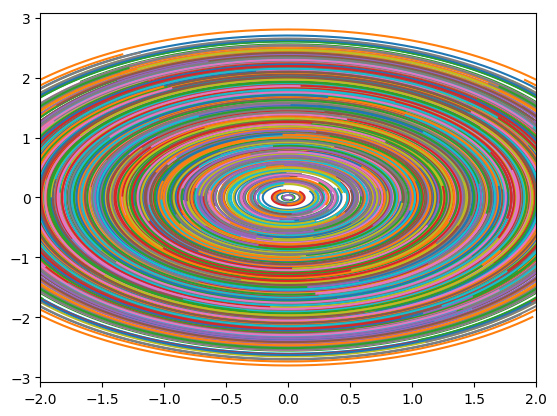

(-2,2)

In [22]:
A5(x,t)=A(0,1,-1,0,x,t)
for i in 1:1000
    x0=2*(2*rand()-1)
    y0=2*(2*rand()-1)#valores entre -2 y 2
    x1=map(x->x[1],RK(A5,tt,[x0,y0]))
    y1=map(x->x[2],RK(A5,tt,[x0,y0]))
    plot(x1,y1)
end
xlim(-2,2)

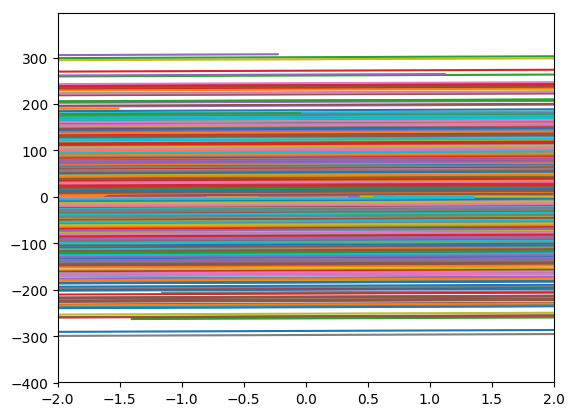

(-2,2)

In [23]:
A6(x,t)=A(1,1,-1,1,x,t)
for i in 1:1000
    x0=2*(2*rand()-1)
    y0=2*(2*rand()-1)#valores entre -2 y 2
    x1=map(x->x[1],RK(A6,tt,[x0,y0]))
    y1=map(x->x[2],RK(A6,tt,[x0,y0]))
    plot(x1,y1)
end
xlim(-2,2)

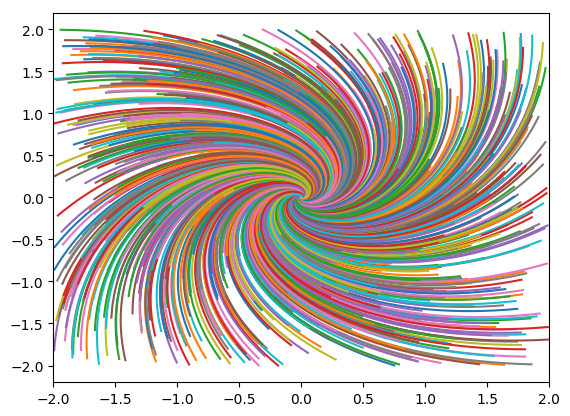

(-2,2)

In [24]:
A7(x,t)=A(-1,1,-1,-1,x,t)
for i in 1:1000
    x0=2*(2*rand()-1)
    y0=2*(2*rand()-1)#valores entre -2 y 2
    x1=map(x->x[1],RK(A7,tt,[x0,y0]))
    y1=map(x->x[2],RK(A7,tt,[x0,y0]))
    plot(x1,y1)
end
xlim(-2,2)

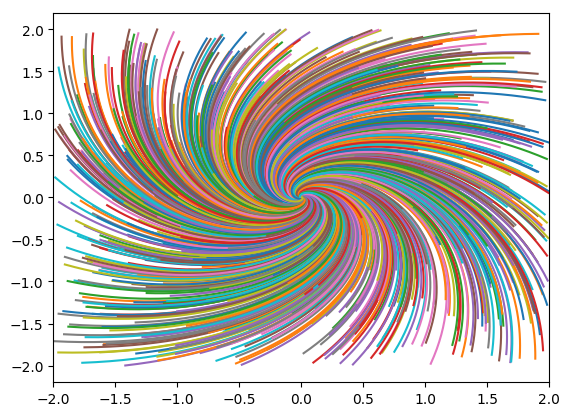

(-2,2)

In [25]:
A8(x,t)=A(-1,-1,1,-1,x,t)
for i in 1:1000
    x0=2*(2*rand()-1)
    y0=2*(2*rand()-1)#valores entre -2 y 2
    x1=map(x->x[1],RK(A8,tt,[x0,y0]))
    y1=map(x->x[2],RK(A8,tt,[x0,y0]))
    plot(x1,y1)
end
xlim(-2,2)

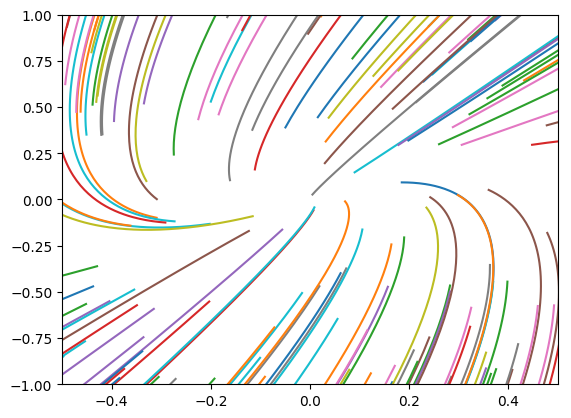

(-1,1)

In [29]:
A9(x,t)=A(1,1,-2,4,x,t)
for i in 1:1000
    x0=2*(2*rand()-1)
    y0=2*(2*rand()-1)#valores entre -2 y 2
    x1=map(x->x[1],RK(A9,tt,[x0,y0]))
    y1=map(x->x[2],RK(A9,tt,[x0,y0]))
    plot(x1,y1)
end
xlim(-0.5,0.5)
ylim(-1,1)

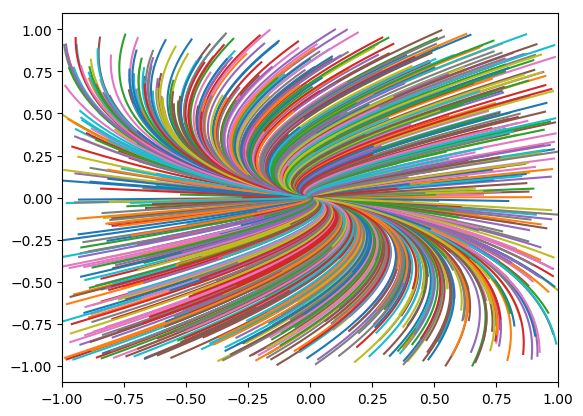

(-1,1)

In [31]:
A10(x,t)=A(-1,-1,0,-1,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    x1=map(x->x[1],RK(A10,tt,[x0,y0]))
    y1=map(x->x[2],RK(A10,tt,[x0,y0]))
    plot(x1,y1)
end
xlim(-1,1)